## OM NAMAH SHIVAAY

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [5]:
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [6]:
image_count = len(list(data_dir.glob('*/*')))
image_count

3670

In [7]:
roses = list(data_dir.glob('roses/*'))
sunflowers = list(data_dir.glob('sunflowers/*'))
daisy = list(data_dir.glob('daisy/*'))
tulips = list(data_dir.glob('tulips/*'))
dandelion = list(data_dir.glob('dandelion/*'))
print(len(roses),len(sunflowers),len(daisy),len(tulips),len(dandelion))

641 699 633 799 898


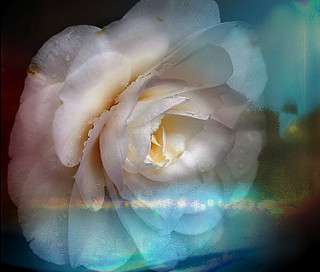

In [8]:
PIL.Image.open(roses[500])

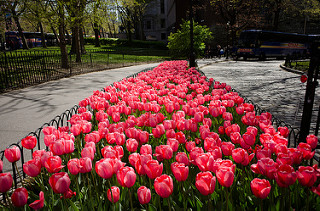

In [9]:
PIL.Image.open(tulips[721])

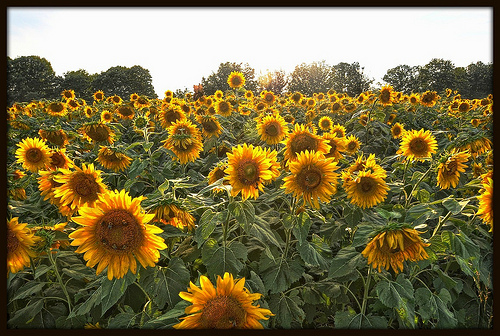

In [10]:
PIL.Image.open(sunflowers[670])

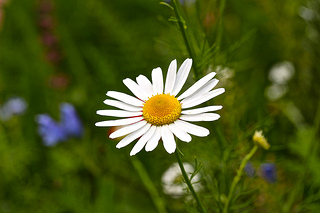

In [11]:
PIL.Image.open(daisy[630])

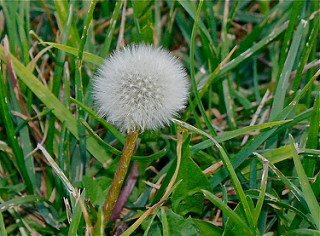

In [12]:
PIL.Image.open(dandelion[890])

In [13]:
flowers = {
    'R' : roses,
    'S' : sunflowers,
    'D' : daisy,
    'T' : tulips,
    'E' : dandelion
}

In [14]:
labels = {
    'R' : 0,
    'S' : 1,
    'D' : 2,
    'T' : 3,
    'E' : 4
}

In [15]:
img = cv2.imread(str(flowers['R'][0]))
print(img.shape)
resize = cv2.resize(img,(200,200))
resize = tf.cast(resize,tf.float32)
resize.dtype

(240, 179, 3)


tf.float32

In [15]:
X = []
Y = []
for flower,images in flowers.items():
    for image in images:
        img = cv2.imread(str(image))
        resize = cv2.resize(img,(200,200))
        resize = tf.cast(resize,tf.float32)
        X.append(resize)
        Y.append(labels[flower])

In [16]:
X = np.array(X)
Y = np.array(Y)

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state = 0)

In [18]:
X_train_scale = X_train/255
X_test_scale = X_test/255

In [40]:
CNN = keras.Sequential([
    keras.layers.Conv2D(16,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(5)
])

In [41]:
CNN.compile(optimizer='adam',
           loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
           metrics=['accuracy'])

In [42]:
CNN.fit(X_train_scale,y_train,epochs=25)

Epoch 1/25
86/86 [==============================] - 6s 59ms/step - loss: 1.5803 - accuracy: 0.3164
Epoch 2/25
86/86 [==============================] - 5s 59ms/step - loss: 1.0050 - accuracy: 0.5984
Epoch 3/25
86/86 [==============================] - 5s 59ms/step - loss: 0.8814 - accuracy: 0.6542
Epoch 4/25
86/86 [==============================] - 5s 60ms/step - loss: 0.6526 - accuracy: 0.7570
Epoch 5/25
86/86 [==============================] - 5s 58ms/step - loss: 0.4451 - accuracy: 0.8603
Epoch 6/25
86/86 [==============================] - 5s 58ms/step - loss: 0.2531 - accuracy: 0.9150
Epoch 7/25
86/86 [==============================] - 5s 59ms/step - loss: 0.1332 - accuracy: 0.9635
Epoch 8/25
86/86 [==============================] - 5s 59ms/step - loss: 0.0864 - accuracy: 0.9786
Epoch 9/25
86/86 [==============================] - 5s 59ms/step - loss: 0.0725 - accuracy: 0.9806
Epoch 10/25
86/86 [==============================] - 5s 59ms/step - loss: 0.0331 - accuracy: 0.9917
Epoch 11/

In [43]:
CNN.evaluate(X_test_scale,y_test)

29/29 [==============================] - 1s 24ms/step - loss: 2.6369 - accuracy: 0.6427


[2.636887550354004, 0.6427015066146851]

In [24]:
predicted = CNN.predict(X_test_scale)
predicted

array([[-3.8069355,  6.105774 , -1.8107514, -3.9703016, 11.276093 ],
       [-2.7726507,  5.470175 , -1.2957366, -3.359388 ,  8.72758  ],
       [-2.3504744,  2.886134 , -1.6848377, -2.5565197,  8.504314 ],
       ...,
       [-3.66013  ,  5.210686 , -1.7553434, -3.7437909, 10.905793 ],
       [-3.6339977,  5.128264 , -2.1024675, -3.778869 , 10.917778 ],
       [-3.6275008,  4.9908185, -2.2283936, -3.9949744, 11.861804 ]],
      dtype=float32)

In [27]:
data_augmentation = tf.keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    keras.layers.experimental.preprocessing.RandomRotation(0.3),
])

In [34]:
CNA = keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(16,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.17),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(5)
])

In [35]:
CNA.compile(optimizer='adam',
           loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
           metrics=['accuracy'])

In [38]:
CNA.fit(X_train_scale,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 31s 352ms/step - loss: 1.5805 - accuracy: 0.3354
Epoch 2/30
86/86 [==============================] - 6s 66ms/step - loss: 1.2127 - accuracy: 0.4586
Epoch 3/30
86/86 [==============================] - 6s 66ms/step - loss: 1.1308 - accuracy: 0.5084
Epoch 4/30
86/86 [==============================] - 6s 66ms/step - loss: 1.0805 - accuracy: 0.5552
Epoch 5/30
86/86 [==============================] - 6s 66ms/step - loss: 1.0346 - accuracy: 0.5803
Epoch 6/30
86/86 [==============================] - 6s 66ms/step - loss: 0.9914 - accuracy: 0.6028
Epoch 7/30
86/86 [==============================] - 6s 66ms/step - loss: 0.9629 - accuracy: 0.6250
Epoch 8/30
86/86 [==============================] - 6s 66ms/step - loss: 0.9469 - accuracy: 0.6217
Epoch 9/30
86/86 [==============================] - 6s 67ms/step - loss: 0.9041 - accuracy: 0.6352 0s -
Epoch 10/30
86/86 [==============================] - 6s 66ms/step - loss: 0.8765 - accuracy: 0.6537
Ep

In [44]:
CNA.evaluate(X_test_scale,y_test)

29/29 [==============================] - 1s 25ms/step - loss: 0.8386 - accuracy: 0.6906


[0.8385740518569946, 0.6906318068504333]